# Семинар 1 – Деревья решений

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn
!pip install pydot

# 1. Деревья решений

## 1.1 Деревья решений в sklearn

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, classification, mean_squared_error, r2_score, roc_auc_score

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Для нагляности в качестве простого примера, возьмем всем известные ирисы

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width

In [ ]:
target_names = iris.target_names
feature_names = iris.feature_names[2:]

y = iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

ValueError: ignored

## 1.1 Визуализация обученного дерева

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Отрисуем дерево
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, feature_names=feature_names,
                      class_names=target_names,
                
out_file='iris_tree.dot', filled=True)

# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng 'iris_tree.dot' -o 'iris_tree.png'

NameError: ignored

<img src='iris_tree.png'>

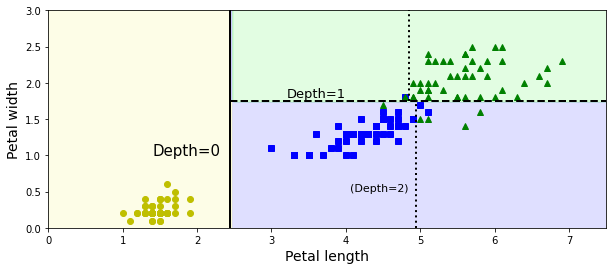

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(10, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## 1.2 Переобучение дерева
Так как при построении дерева используется принцип жадной максимизации, то дерево достаточно легко переобучить

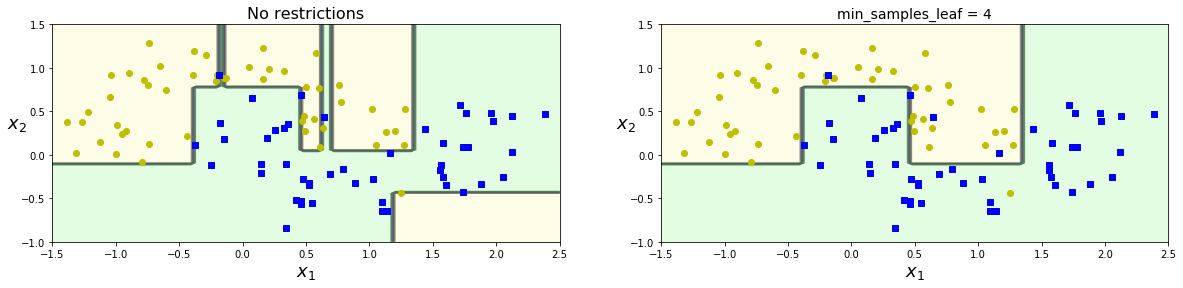

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

## 1.3 Чувствительность дерева к выборкам

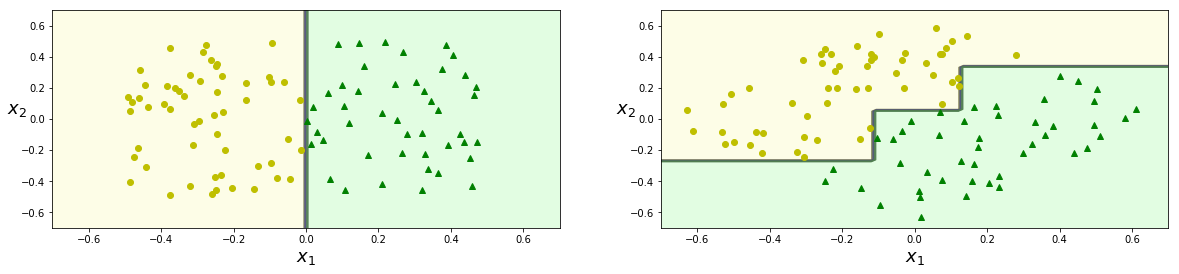

In [ ]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

## 1.4 Регрессионые решающие деревья

In [ ]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

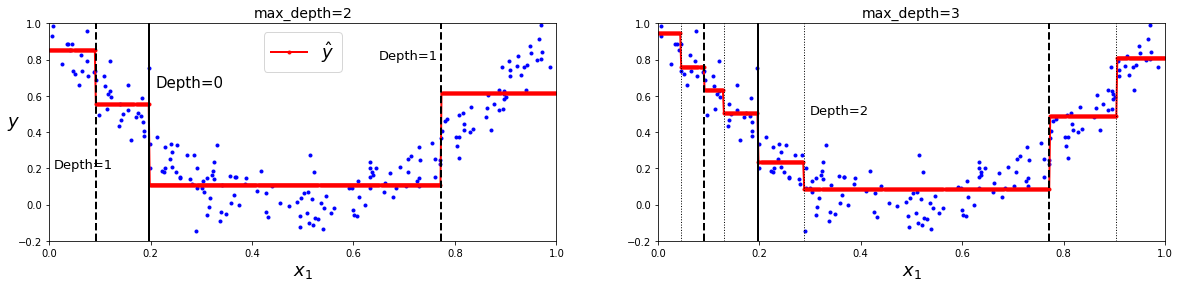

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

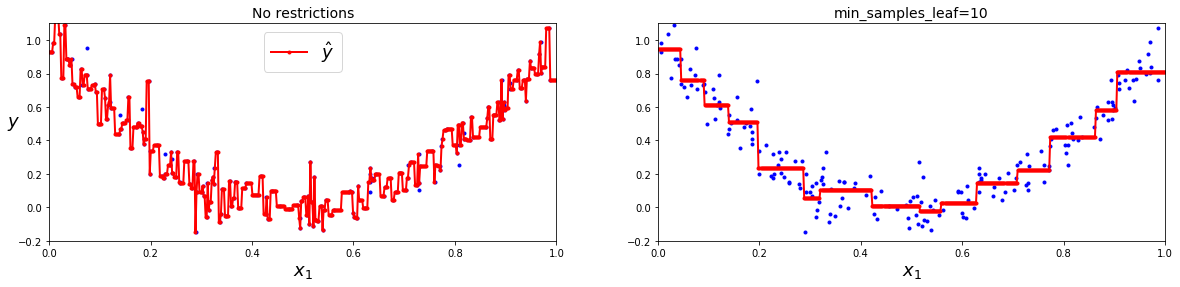

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(20, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

## 1.5 Применение на реальных данных

### 1.5.1 Платформа kaggle
Будем использовать данныые с соревнования: [Прогнозирование задержек рейсов](https://www.kaggle.com/c/departure-delayed)   
Начем с того, что загрузим данные

In [ ]:
import zipfile
with zipfile.ZipFile("./gdrive/My Drive/Colab Notebooks/Семинар 2/departure-delayed.zip","r") as zip_ref:
    zip_ref.extractall("./gdrive/My Drive/Colab Notebooks/Семинар 2/departure-delayed")

In [ ]:
train = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Семинар 2/departure-delayed/train_features.csv').fillna(0)
test = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Семинар 2/departure-delayed/test_features.csv').fillna(0)

In [ ]:
y = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Семинар 2/departure-delayed/train_target.csv', index_col='id')

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Посмотрим размеры выборок

In [ ]:
train.shape, test.shape, y.shape

((1355730, 13), (581028, 13), (1355730, 1))

Посмотрим как выглядят данные

In [ ]:
train.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance
0,2008,4,23,3,700,907,US,1195,N119US,307.0,PHL,PHX,2075
1,2008,7,18,5,2154,2349,US,401,N637AW,115.0,PHX,SFO,651
2,2008,12,21,7,1921,1949,NW,1767,N782NC,88.0,DTW,MSN,312
3,2008,4,24,4,1955,2020,WN,1865,N272WN,145.0,SAT,PHX,843
4,2008,6,27,5,1700,1848,OH,5186,N804CA,108.0,ORF,CVG,485


Для начала, мы рассмотрим переменные, заданные числами

In [ ]:
train.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance
count,1355730.0,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06
mean,2008.0,6.110740e+00,1.574999e+01,3.983747e+00,1.467329e+03,1.634319e+03,2.184460e+03,1.342627e+02,7.655388e+02
std,0.0,3.483056e+00,8.777616e+00,1.996024e+00,4.248367e+02,4.644701e+02,1.944718e+03,7.133404e+01,5.745182e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.200000e+01,1.100000e+01
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,6.100000e+02,8.200000e+01,3.380000e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.543000e+03,1.160000e+02,6.060000e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.015000e+03,3.422000e+03,1.650000e+02,9.980000e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,9.741000e+03,6.600000e+02,4.962000e+03


In [ ]:
# Проверим, прежде чем выкидывать признак:
print("Значений признака 'year' в трейне " ,  train['Year'].nunique())
print("Значений признака 'year' в тесте " ,  test['Year'].nunique())

Значений признака 'year' в трейне  1
Значений признака 'year' в тесте  1


Итак, какие выводы мы можем сделать? 
1. Признак `year` не несет вариативности в данные - удалим его
2. Признаки `Month`, `DayofMonth`, `DayOfWeek` скорее всего можно рассматривать как категориальные

In [ ]:
train.drop('Year', axis=1, inplace=True)
test.drop('Year', axis=1, inplace=True)

In [ ]:
types = train.dtypes
real_cols = list(types[types != 'object'].index.values)
cat_cols = list(types[types == 'object'].index.values)
types

Month               int64
DayofMonth          int64
DayOfWeek           int64
CRSDepTime          int64
CRSArrTime          int64
UniqueCarrier      object
FlightNum           int64
TailNum            object
CRSElapsedTime    float64
Origin             object
Dest               object
Distance            int64
dtype: object

Построим зависимость ошибки от максимальной глубины дерева

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train, y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
mse_train = []
mse_val = []

for i in range(10):
    dt = DecisionTreeRegressor(max_depth=i*5+1)
    dt.fit(x_train[real_cols], y_train)
    mse_train = np.append(mse_train, mean_squared_error(dt.predict(x_train[real_cols]), y_train))
    mse_val = np.append(mse_val, mean_squared_error(dt.predict(x_val[real_cols]), y_val))

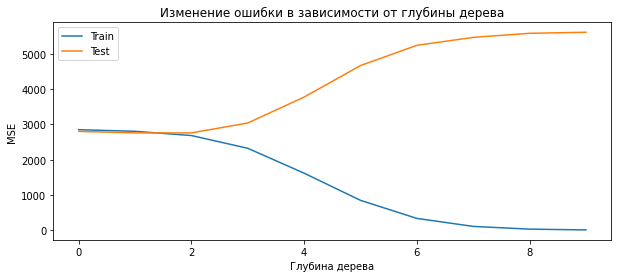

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева')

plt.plot(mse_train, label='Train')
plt.plot(mse_val, label='Test')
plt.legend()
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.show()

А теперь то же самое с регуляризацией

In [ ]:
mse_train = []
mse_val = []

# Ваш Код здесь

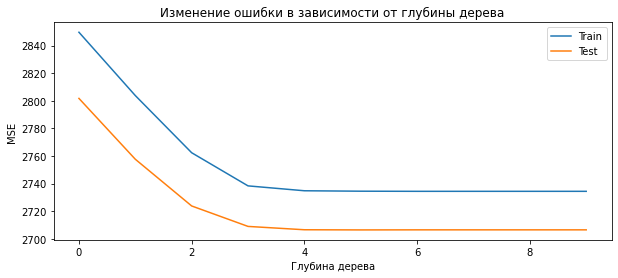

In [ ]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева')

plt.plot(mse_train, label='Train')
plt.plot(mse_val, label='Test')
plt.legend()
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
# Обучим классификатор
# dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=1000, min_samples_split=1000)
# dt.fit(train[real_cols], y)
mean_squared_error(dt.predict(x_val[real_cols]), y_val.values)

2706.430040574856

In [ ]:
y_val.values

array([[ 6.],
       [29.],
       [60.],
       ...,
       [13.],
       [35.],
       [15.]])

### 1.5.2 Работа с категориальными переменными
One hot encoding

Представим, что у нас есть признак, который принимает n значений, One hot encoding создает n признаков вместо изначального, при этом каждый новый признак принимает значения $\{0,1\}$, при этом все признаки каждого объекта будут равны 0, и только один 1

Возможно использовать `OneHotEncoder` из sklearn.preprocessing, но мы будем испольовать `pandas`

In [ ]:
print(train['UniqueCarrier'].unique())
print(train['UniqueCarrier'].nunique())

['US' 'NW' 'WN' 'OH' 'AA' 'EV' 'B6' 'MQ' 'YV' 'DL' 'UA' 'AS' 'XE' 'OO'
 'FL' 'CO' 'F9' 'HA']
18


In [ ]:
train = pd.get_dummies(train, drop_first=True, columns=['UniqueCarrier'])
test = pd.get_dummies(test, drop_first=True, columns=['UniqueCarrier'])

In [ ]:
train.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
1,7,18,5,2154,2349,401,N637AW,115.0,PHX,SFO,651,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,12,21,7,1921,1949,1767,N782NC,88.0,DTW,MSN,312,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,24,4,1955,2020,1865,N272WN,145.0,SAT,PHX,843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,6,27,5,1700,1848,5186,N804CA,108.0,ORF,CVG,485,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,9,28,7,640,811,1424,N779NC,91.0,MCI,MEM,392,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 1.5.3 Кодирование переменных

In [ ]:
#Создадим новую фичу 'route', которая будет содержать информацию как о точке отправления, так и о месте назначения
train['route'] = train['Origin'] + train['Dest']
test['route'] = test['Origin'] + test['Dest']
train['route'].nunique(), test['route'].nunique()

(5130, 5001)

Давайте закодируем каждое значение 'route' средним значением целевой переменной для этого значения

In [ ]:
code_route = pd.pivot_table(pd.concat([pd.DataFrame(train), y],axis=1), 
                            index='route', values='DelayTime', aggfunc='mean')

In [ ]:
train['route'] = train['route'].apply(lambda x: code_route.loc[x][0] if x in code_route.index else 0)
test['route'] = test['route'].apply(lambda x: code_route.loc[x][0] if x in code_route.index else 0)

In [ ]:
train.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,route
1,7,18,5,2154,2349,401,N637AW,115.0,PHX,SFO,651,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,40.0
2,12,21,7,1921,1949,1767,N782NC,88.0,DTW,MSN,312,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,31.0
3,4,24,4,1955,2020,1865,N272WN,145.0,SAT,PHX,843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,71.0
4,6,27,5,1700,1848,5186,N804CA,108.0,ORF,CVG,485,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15.0
5,9,28,7,640,811,1424,N779NC,91.0,MCI,MEM,392,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,21.0


### 1.5.4 OneHotEncoding
А давайте напишем свой OHE

In [ ]:
from scipy import sparse

class OneHotEncoder():
    """
    OneHotEncoder берет матрицу данных с категориальными столбцами 
    и преобразует ее в разреженную двоичную закодированную матрицу.
    """
    def __init__(self):
        self.keymap = None

    def fit(self, X):
        self.keymap = []
        for col in X.T:
            # Ваш Код здесь

    def transform(self, X):
        if self.keymap is None:
            self.fit(X)

        outdat = []
        for i, col in enumerate(X.T):
            km = self.keymap[i]
            num_labels = len(km)
            spmat = sparse.lil_matrix((X.shape[0], num_labels))
            # Ваш Код здесь
        outdat = np.array(sparse.hstack(outdat).toarray())
        return outdat

In [ ]:
def sparsify(X, X_test):
    """Возвращает закодированный датасет."""
    enc = OneHotEncoder()
    enc.fit(np.vstack((X, X_test)))
    return enc.transform(X), enc.transform(X_test)

In [ ]:
#Заново произведем отбор признаков 
types = train.dtypes
real_cols = list(types[types != 'object'].index.values)
cat_cols = list(types[types == 'object'].index.values)

In [ ]:
cat_cols

['UniqueCarrier', 'TailNum', 'Origin', 'Dest']

In [ ]:
X_cat, X_test_cat = sparsify(np.array(x_train[cat_cols]), np.array(x_val[cat_cols]))

In [ ]:
X_test_cat.shape

In [ ]:
train[real_cols].shape

In [ ]:
np.hstack((train[real_cols],X_cat)).shape

In [ ]:
np.hstack((test[real_cols],X_test_cat)).shape

In [ ]:
y.shape

In [ ]:
# Обучим классификатор
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10000, min_samples_split=10000)
dt.fit(np.hstack((x_train[real_cols],X_cat)), y)


mean_squared_error(np.hstack((x_val[real_cols],X_test_cat), y_val.values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10000, min_samples_split=10000,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### 1.5.5 Обучим классификатор и сделаем Submit 

In [ ]:
# Обучим классификатор
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10000, min_samples_split=10000)
dt.fit(train[real_cols], y)

In [ ]:
test = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Семинар 2/departure-delayed/test_features.csv').fillna(0)

In [ ]:
submit_solo_tree = pd.read_csv('./gdrive/My Drive/Colab Notebooks/Семинар 2/departure-delayed/sample_submission.csv', index_col='id')
submit_solo_tree['DelayTime'] = dt.predict(np.hstack((test[real_cols])))
submit_solo_tree.to_csv('./gdrive/My Drive/Colab Notebooks/Семинар 2/departure-delayed/submit_solo_tree.csv', index='id')

ValueError: ignored

И будем Валидирвоаться непосрелственно на лидерборде [соревнования](https://www.kaggle.com/c/departure-delayed)

# Построение дерева решений

### 2.1. Самостоятельное написание дерева решений
Источник: [mlcourse.ai](https://mlcourse.ai) от [Юрия Кашницкого](https://yorko.github.io) и [OpenDataScience](https://ods.ai)

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, нужно построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. 

In [ ]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

NameError: ignored

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку.

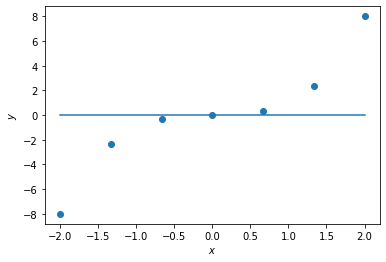

In [ ]:
# Ваш Код здесь
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
# Ваш Код здесь
plt.ylabel(r'$y$');

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

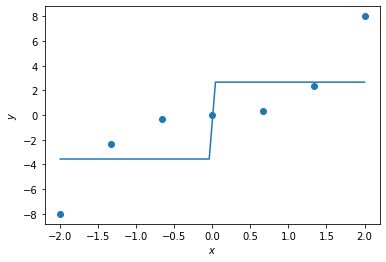

In [ ]:

X = np.linspace(-2, 2, 7)
y = X ** 3
plt.scatter(X, y)

plt.xlabel(r'$x$')
# Ваш Код здесь
plt.ylabel(r'$y$');

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий: $$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$ где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[xj < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$: $$D(X) = \dfrac{1}{|X|} \sum{x_j \in X}(yj – \dfrac{1}{|X|}\sum{x_i \in X}y_i)^2,$$ где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине).

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

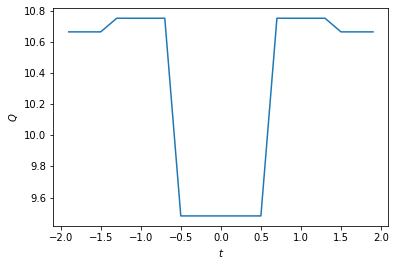

In [ ]:


X = np.linspace(-2, 2, 7)
y = X ** 3
# Ваш Код здесь

    
plt.xlabel(r'$t$')
plt.plot(T, Q)
plt.ylabel(r'$Q$');

In [ ]:
T[np.argmin(Q)]

0.09999999999999987

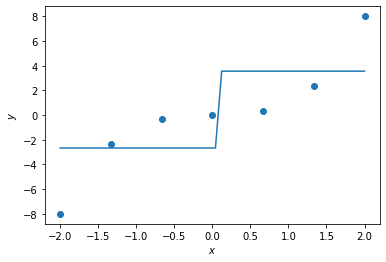

In [ ]:
# Ваш Код здесь
X = np.linspace(-2, 2, 7)
y = X ** 3
plt.scatter(X, y)
plt.xlabel(r'$x$')
y_pred = y
y_pred_l[:] = np.mean(y[X < T[np.argmin(Q)]])
y_pred_r[:] = np.mean(y[X >= T[np.argmin(Q)]])
y_pred = np.concatenate((y_pred_l, y_pred_r))
plt.plot(np.linspace(-2,2,50), y_pred)
plt.ylabel(r'$y$');